<h2 style='color:Orange' align='center'>Advanced Image Recognition for the Next Era.<h2>

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

<h3 style='color:purple'>(1) Preprocessing: Detect face and eyes.</h3>

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes??

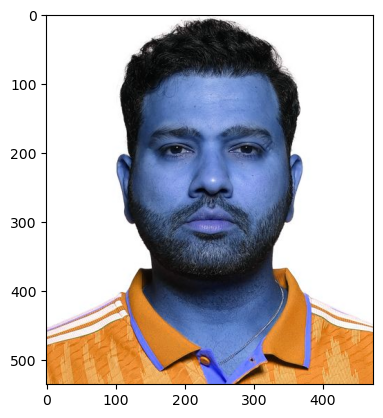

In [2]:
img = cv2.imread("D:/Data Science/Infosys Intership/test_images/e6ba5fe78edce42564ff1e3352520d45.jpg")
plt.imshow(img)

In [3]:
# Check the shape of the image
print("Image shape:", img.shape)

Image shape: (535, 473, 3)


In [4]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(535, 473)

In [5]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [164, 158, 147, ..., 122, 119, 120],
       [153, 159, 146, ..., 123, 122, 125],
       [147, 163, 148, ..., 125, 125, 132]], dtype=uint8)

In [6]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(535, 473)

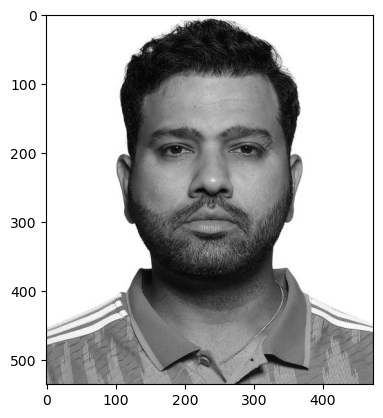

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier("D:/Data Science/Infosys Project/opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("D:/Data Science/Infosys Project/opencv/haarcascades/haarcascade_eye_tree_eyeglasses.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[100,  83, 274, 274]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(100, 83, 274, 274)

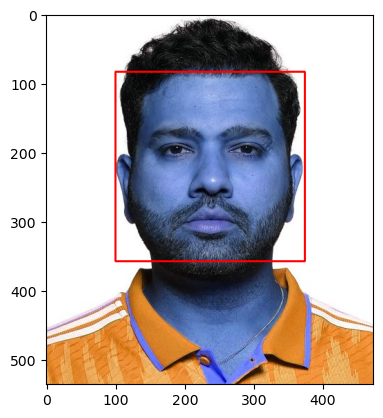

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

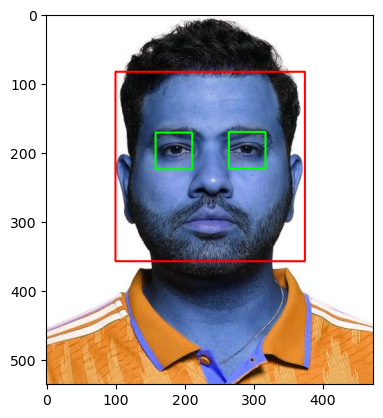

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h3 style='color:purple'>(2) Preprocessing: Crop the facial region of the image</h3>

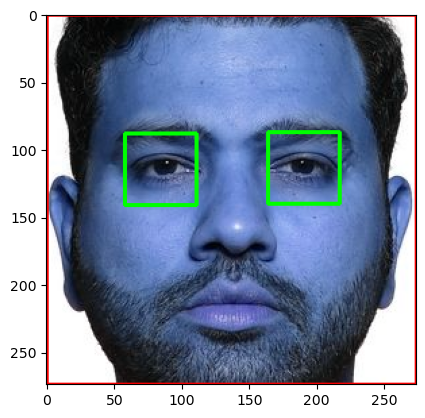

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
cropped_img = np.array(roi_color)
cropped_img.shape

(274, 274, 3)

<h3 style='color:purple'>(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region</h3>

####  Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

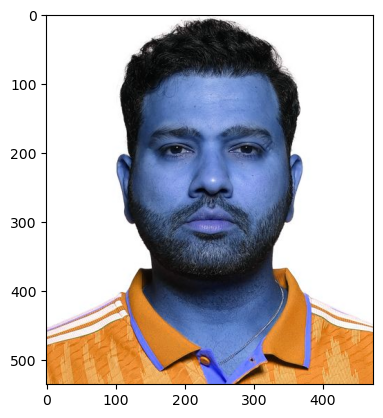

In [15]:
original_image = cv2.imread("D:/Data Science/Infosys Intership/test_images/e6ba5fe78edce42564ff1e3352520d45.jpg")
plt.imshow(original_image)

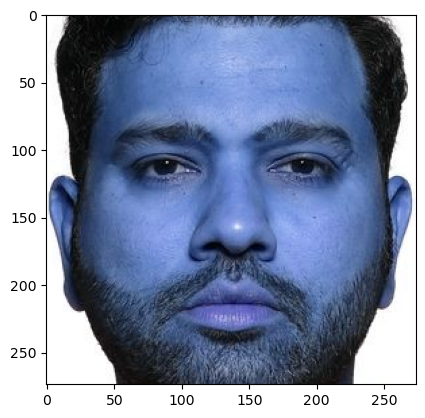

In [16]:
cropped_image = get_cropped_image_if_2_eyes("D:/Data Science/Infosys Intership/test_images/e6ba5fe78edce42564ff1e3352520d45.jpg")
plt.imshow(cropped_image)

**Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training**

In [17]:
path_to_data = "D:/Data Science/Infosys Project/Train/"

path_to_cr_data = "D:/Data Science/Infosys Project/Test/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['D:/Data Science/Infosys Project/Train/Amitabh Bachchan',
 'D:/Data Science/Infosys Project/Train/Narendra Modi',
 'D:/Data Science/Infosys Project/Train/Rohit Sharama',
 'D:/Data Science/Infosys Project/Train/Virat Kholi']

**Go through all images in dataset folder and create cropped images for them. There will be Test folder inside Project folder after you run this code**

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  D:/Data Science/Infosys Project/Test/Amitabh Bachchan
Generating cropped images in folder:  D:/Data Science/Infosys Project/Test/Narendra Modi
Generating cropped images in folder:  D:/Data Science/Infosys Project/Test/Rohit Sharama
Generating cropped images in folder:  D:/Data Science/Infosys Project/Test/Virat Kholi


### Now you should have cropped folder under datasets folder that contains cropped images

### Manually examine cropped folder and delete any unwanted images

In [22]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Amitabh Bachchan': 0,
 'Narendra Modi': 1,
 'Rohit Sharama': 2,
 'Virat Kholi': 3}